<a href="https://colab.research.google.com/github/Emrekorkmz0/flower_classification/blob/main/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import os
import random
import warnings
warnings.filterwarnings('ignore')

pre-proccessing of images

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Target Directory
directory_train = "/content/drive/MyDrive/ALL_COLAB_FİLES/train"
directory_val="/content/drive/MyDrive/ALL_COLAB_FİLES/validation"

# Train Data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
             directory_train,
             subset='training',
             validation_split=0.2,
             image_size=IMAGE_SIZE,
             batch_size=BATCH_SIZE,
             seed=42)

# Valid data
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
            directory_val,
            subset='validation',
            validation_split=0.2,
            image_size=IMAGE_SIZE,
            batch_size=BATCH_SIZE,
             seed=42)

Found 2746 files belonging to 5 classes.
Using 2197 files for training.
Found 318 files belonging to 5 classes.
Using 63 files for validation.


In [ ]:
class_names = train_data.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

Label-encoding to 0-1-2..

In [ ]:
label_encoder=LabelEncoder()
label_encoder=label_encoder.fit_transform(class_names)

label_encoder




array([0, 1, 2, 3, 4])

In [ ]:
def preproces_img(img,label,img_shape=224):
  img=tf.image.resize(img,[img_shape,img_shape])
  img=img/255.0
  #converting float cause of 255.0
  return tf.cast(img,tf.float32),label


In [ ]:
img=plt.imread('/content/drive/MyDrive/ALL_COLAB_FİLES/train/daisy/10140303196_b88d3d6cec.jpg')
preproces_img(img=img,label='daisy')

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.8336642 , 0.8462414 , 0.8768349 ],
         [0.8130432 , 0.8363275 , 0.8610474 ],
         [0.81818527, 0.8262249 , 0.8556529 ],
         ...,
         [0.02468568, 0.02980508, 0.04505105],
         [0.03877311, 0.03104823, 0.05065607],
         [0.03004489, 0.02913463, 0.04723682]],
 
        [[0.84418017, 0.86318386, 0.8915321 ],
         [0.8521515 , 0.8675061 , 0.89420843],
         [0.84848404, 0.84822947, 0.87998396],
         ...,
         [0.041245  , 0.04124972, 0.05832786],
         [0.04998644, 0.04472099, 0.06432883],
         [0.03034358, 0.03231301, 0.04897535]],
 
        [[0.8524637 , 0.86006045, 0.88842577],
         [0.8526117 , 0.8520873 , 0.8834376 ],
         [0.87316114, 0.88484704, 0.9123243 ],
         ...,
         [0.02721254, 0.02360819, 0.04227071],
         [0.01533367, 0.01920272, 0.03881056],
         [0.02448821, 0.02840978, 0.04409605]],
 
        ...,
 
        [[0.79265946, 0.81678414

In [ ]:
# map the preprocess_image to train_data
train_data = train_data.map(map_func=preproces_img, num_parallel_calls=tf.data.AUTOTUNE)
# shuffle the data
train_data = train_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)


# map the preprocess_image to valid_data
valid_data = valid_data.map(map_func=preproces_img, num_parallel_calls=tf.data.AUTOTUNE)
# shuffle the data
valid_data = valid_data.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data, valid_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

creating model

In [ ]:
tf.random.set_seed(42)


model = Sequential([
    Conv2D(filters=32, kernel_size=4, padding='same', activation='relu',input_shape=(224,224,3)),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.5),
    Flatten(),
    Dense(len(label_encoder), activation='softmax')
])

# Compile
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

# Fit
history = model.fit(train_data,
                       epochs=32,
                       validation_data=valid_data)



Epoch 1/40
69/69 [==============================] - 16s 97ms/step - loss: 1.3765 - accuracy: 0.4078 - val_loss: 1.1384 - val_accuracy: 0.5556
Epoch 2/40
69/69 [==============================] - 14s 88ms/step - loss: 1.1329 - accuracy: 0.5508 - val_loss: 0.7973 - val_accuracy: 0.7302
Epoch 3/40
69/69 [==============================] - 14s 87ms/step - loss: 0.9803 - accuracy: 0.6181 - val_loss: 0.6262 - val_accuracy: 0.7460
Epoch 4/40
69/69 [==============================] - 14s 86ms/step - loss: 0.8268 - accuracy: 0.6950 - val_loss: 0.4493 - val_accuracy: 0.8413
Epoch 5/40
69/69 [==============================] - 13s 88ms/step - loss: 0.6409 - accuracy: 0.7697 - val_loss: 0.3714 - val_accuracy: 0.8889
Epoch 6/40
69/69 [==============================] - 13s 89ms/step - loss: 0.4884 - accuracy: 0.8352 - val_loss: 0.2914 - val_accuracy: 0.9048
Epoch 7/40
69/69 [==============================] - 15s 88ms/step - loss: 0.3275 - accuracy: 0.8908 - val_loss: 0.2665 - val_accuracy: 0.9365
Epoch 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 224, 224, 32)      1568      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 112, 112, 64)      32832     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 56, 56, 64)        65600     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 28, 28, 64)       

drawing the graph of accuracy and loss

In [ ]:
def plot_loss_graph(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accur=history.history['accuracy']
  val_accur=history.history['val_accuracy']

  plt.plot(loss,label='train_Loss')
  plt.plot(val_loss,label='val_Loss')

  epochs=range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accur, label='training_accuracy')
  plt.plot(epochs, val_accur, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

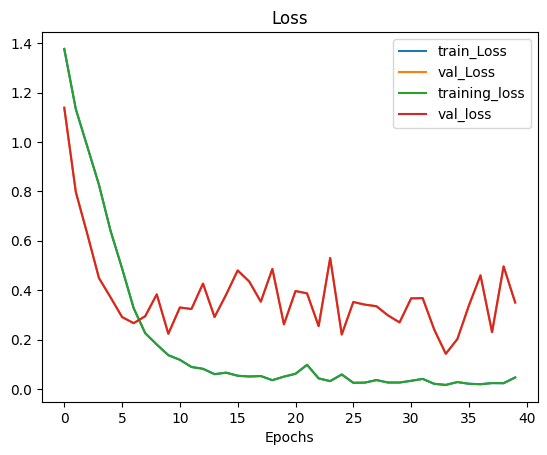

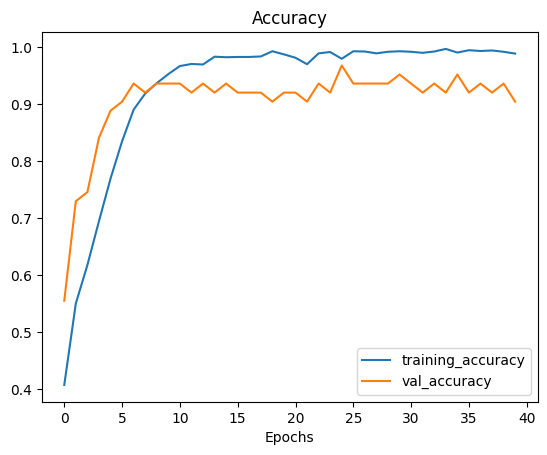

In [ ]:
plot_loss_graph(history)

Transfer Learning


In [ ]:
# Download Inception V3 model
base_model_inception = tf.keras.applications.inception_v3.InceptionV3(include_top=False)

# Freeze the layers
base_model_inception.trainable=False

# Inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# Scaling the values
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# Pass inputs to our base_model
x = base_model_inception(inputs,training=False)

# GlobalAveragePooling2D
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# outputs
outputs = tf.keras.layers.Dense(len(label_encoder), activation='softmax')(x)

# Build model
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 21813029 (83.21 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
# Fit the model
history_2 = model_2.fit(train_data,
                       epochs=7,
                       validation_data=valid_data)

Epoch 1/7
69/69 [==============================] - 28s 182ms/step - loss: 0.8414 - accuracy: 0.6718 - val_loss: 0.3977 - val_accuracy: 0.8730
Epoch 2/7
69/69 [==============================] - 13s 78ms/step - loss: 0.4575 - accuracy: 0.8348 - val_loss: 0.2898 - val_accuracy: 0.9048
Epoch 3/7
69/69 [==============================] - 13s 79ms/step - loss: 0.3506 - accuracy: 0.8844 - val_loss: 0.2465 - val_accuracy: 0.8889
Epoch 4/7
69/69 [==============================] - 13s 80ms/step - loss: 0.2923 - accuracy: 0.9044 - val_loss: 0.2189 - val_accuracy: 0.9365
Epoch 5/7
69/69 [==============================] - 13s 81ms/step - loss: 0.2576 - accuracy: 0.9208 - val_loss: 0.2026 - val_accuracy: 0.9365
Epoch 6/7
69/69 [==============================] - 14s 76ms/step - loss: 0.2244 - accuracy: 0.9326 - val_loss: 0.1919 - val_accuracy: 0.9524
Epoch 7/7
69/69 [==============================] - 13s 76ms/step - loss: 0.2018 - accuracy: 0.9426 - val_loss: 0.1850 - val_accuracy: 0.9524


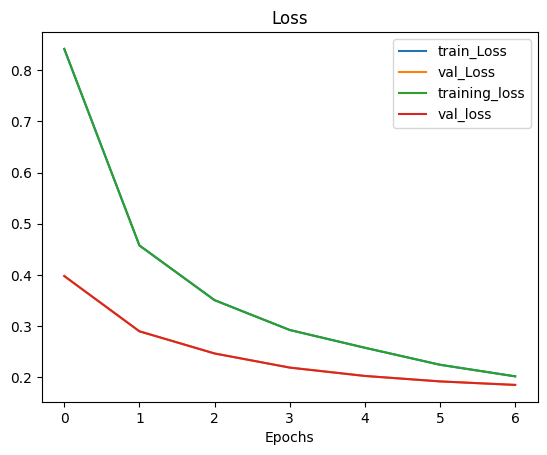

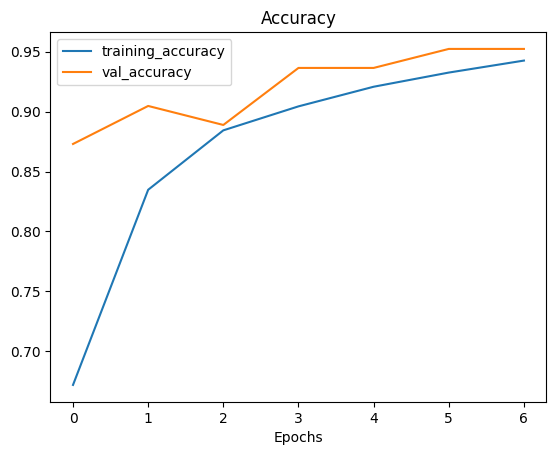

In [ ]:
plot_loss_graph(history_2)

2/2 [==============================] - 0s 27ms/step - loss: 0.3501 - accuracy: 0.9048
Validation Loss: 0.3501
Validation Accuracy: 0.9048
2/2 [==============================] - 0s 21ms/step


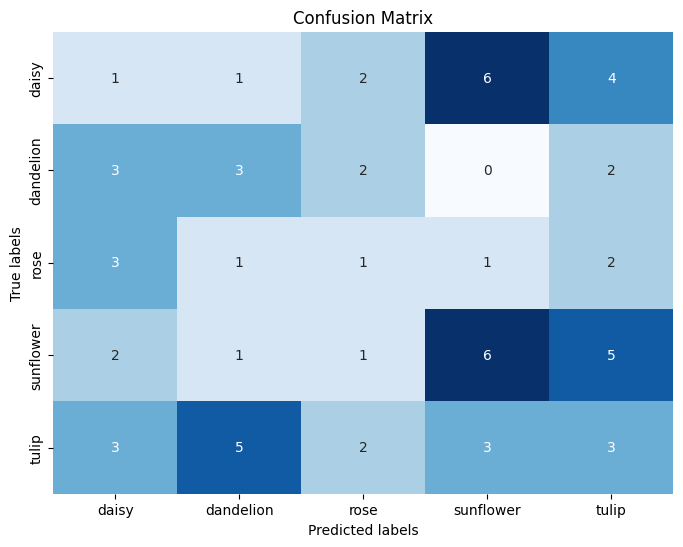

In [ ]:
validation_loss, validation_accuracy = model.evaluate(valid_data)

print(f"Validation Loss: {validation_loss:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")



# Predict on validation data
predictions_val = model.predict(valid_data)
predicted_labels_val = np.argmax(predictions_val, axis=1)



# Get true labels for val
true_labels_val = np.concatenate([y for x, y in valid_data], axis=0)



# Calculate confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=true_labels_val, predictions=predicted_labels_val)


# Convert confusion matrix to numpy array
confusion_matrix = confusion_matrix.numpy()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
            yticklabels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

            )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(train_data)

print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")


# Predict on train data
predictions_train = model.predict(train_data)
predicted_labels_train = np.argmax(predictions_train, axis=1)

# Get true labels for train
true_labels_train = np.concatenate([y for x, y in train_data], axis=0)


# Calculate confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=true_labels_train, predictions=predicted_labels_train)


# Convert confusion matrix to numpy array
confusion_matrix = confusion_matrix.numpy()



# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
            yticklabels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

            )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()